In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb

In [2]:
TRAIN_DATASET_PATH_NAME = 'question4/q4-train-dataset.csv'
TEST_DATASET_PATH_NAME = 'question4/q4-test-dataset.csv'
training_data = pd.read_csv(TRAIN_DATASET_PATH_NAME)
train_labels = pd.read_csv(TRAIN_DATASET_PATH_NAME)['Class']
test_data = pd.read_csv(TEST_DATASET_PATH_NAME)
test_labels = pd.read_csv(TEST_DATASET_PATH_NAME)['Class']

In [3]:
pd.read_csv(TRAIN_DATASET_PATH_NAME).describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-2.472076,1.791688,-3.343842,2.353146,-1.726877,-0.675299,-2.822953,0.532846,-1.190607,-2.870033,...,0.226404,0.035293,-0.047865,-0.059020,0.051454,0.018286,0.147463,0.040371,110.454312,0.500000
std,5.642208,3.704205,6.386363,3.157747,4.280113,1.629036,5.868131,4.273147,2.454235,4.500099,...,2.119400,0.997956,1.211530,0.570337,0.702780,0.468559,0.950435,0.420709,257.038901,0.500313
min,-30.552380,-9.581941,-31.103685,-4.759357,-22.105532,-5.430971,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.239018,-7.263482,-1.869290,0.000000,0.000000
25%,-2.867222,-0.135256,-4.893066,0.014758,-1.936099,-1.431466,-3.066415,-0.193072,-2.300225,-4.599841,...,-0.175392,-0.516574,-0.248878,-0.403021,-0.315221,-0.296317,-0.049332,-0.053126,1.980000,0.000000
50%,-0.808549,0.924360,-1.072892,1.420504,-0.551889,-0.587540,-0.638812,0.159739,-0.646901,-0.835288,...,0.110877,0.023243,-0.049977,0.004873,0.096922,-0.044476,0.061239,0.031197,22.020000,0.500000
75%,1.036652,2.765175,0.590016,4.184137,0.412375,0.130210,0.229140,0.831049,0.328035,-0.017808,...,0.679986,0.507136,0.172261,0.373124,0.454844,0.303328,0.474608,0.210339,99.990000,1.000000
max,2.352089,22.057729,3.413100,12.114672,11.095089,6.474115,6.248514,20.007208,4.446884,5.759475,...,27.202839,8.361985,5.466230,1.145470,2.314746,2.745261,3.052358,1.779364,2763.250000,1.000000


In [4]:
def normalize_features(data):
    np_data = data.to_numpy()
    minimum = np.array(data.min())
    maximum = np.array(data.max())
    train_data = []
    for sample in np_data:
        train_data.append(np.divide(np.subtract(sample[0:-1], minimum[0:-1]), np.subtract(maximum[0:-1], minimum[0:-1])))
    return np.array(train_data)

In [5]:
def get_features(train):
    feature_matrix = np.zeros((train.shape[0], train.shape[1] + 1))
    for sample_idx in range(train.shape[0]):
        sample = [1]
        for feature_idx in range(train.shape[1]):
            sample.append(train[sample_idx][feature_idx])
        feature_matrix[sample_idx] = sample
    return feature_matrix

In [6]:
def decide_decision_boundary(train_matrix, mean, stdev, labels):
    w = np.random.normal(mean, stdev, train_matrix.shape[1])
    positive_above_bound = 0
    negative_above_bound = 0
    for data_idx in range(train_matrix.shape[0]):
        boundary = np.sum(np.dot(train_matrix[data_idx], w))
        if boundary > 0:
            if labels[data_idx] == 1:
                positive_above_bound += 1
            else:
                negative_above_bound += 1
    if negative_above_bound > positive_above_bound:
        return (w, 0)
    return (w, 1)

In [7]:
def report_most_important_weights(w, count):
    w_imp = np.sort(w)
    return w_imp[count * -1:]

In [8]:
def calc_full_batch_step(feature_matrix, weights, labels, boundary_type):
    if boundary_type == 0:
        y = 1 - labels
    else:
        y = labels
    reg_sum = np.dot(feature_matrix, weights)
    reg_sum = np.exp(reg_sum)
    reg_const = reg_sum / (1 + reg_sum)
    return np.dot(np.transpose(feature_matrix), (y - reg_const))

In [9]:
def train_full_batch_model(feature_matrix, labels, step_size):
    initial_decision = decide_decision_boundary(feature_matrix, 0, 0.01, labels)
    weights = initial_decision[0]
    boundary_selection = initial_decision[1]
    for iteration in range(1000):
        weights = np.add(weights, step_size * calc_full_batch_step(feature_matrix, weights, train_labels, boundary_selection))
        if iteration % 100 == 99:
            print('Weights at iteration ' + str(iteration + 1) + ': ' + str(weights))
            print('Most important weights: ' + str(report_most_important_weights(weights, 10)))
    return [boundary_selection, weights]

In [10]:
def predict_labels(test_set, weights, boundary_label):
    predictions = []
    for sample in test_set:
        if boundary_label == 0:
            if np.dot(sample, weights) > 0:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if np.dot(sample,weights) > 0:
                predictions.append(1)
            else:
                predictions.append(0)
    return predictions

In [11]:
def evaluate_full_batch_model(train_set, train_labels, test_set, test_labels):
    train_features = normalize_features(train_set)
    test_features = normalize_features(test_set)
    train_label = train_labels.to_numpy()
    test_label = test_labels.to_numpy()
    train_features = get_features(train_features)
    test_features = get_features(test_features)
    decision = train_full_batch_model(train_features, train_label, 0.05)
    boundary_label = decision[0]
    weights = decision[1]
    predictions = predict_labels(test_features, weights, boundary_label)
    tp, fp, fn, tn = 0, 0, 0, 0
    for idx in range(test_label.size):
        if test_label[idx] == 1:
            if test_label[idx] == predictions[idx]:
                tp += 1
            else:
                fn += 1
        else:
            if test_label[idx] == predictions[idx]:
                tn += 1
            else:
                fp += 1
    print('Performance Metrics for Full-Batch Model:')
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print('Accuracy:' + str(accuracy))
    precision = tp / (tp + fp)
    print('Precision:' + str(precision))
    recall = tp / (tp + fn)
    print('Recall:' + str(recall))
    npv = tn / (tn + fn)
    print('Negative Predictive Value(NPV): ' + str(npv))
    fpr = fp / (fp + tn)
    print('False Positive Rate(FPR): ' + str(fpr))
    fdr = fp / (tp + fp)
    print('False Discovery Rate(FDR): ' + str(fdr))
    f1 = (2 * precision * recall) / (precision + recall)
    print('F1 Measure: ' + str(f1))
    f2 = (5 * precision * recall) / (4 * precision + recall)
    print('F2 Measure: ' + str(f2))
    confusion_matrix = pd.DataFrame([[tp, fp], [fn, tn]], columns = ['1', '0'], index = ['1', '0'])
    sb.heatmap(confusion_matrix, annot = True)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion Matrix for Full-Batch Gradient Ascent')
    plt.show()
    plt.clf()
    return [accuracy, precision, recall, npv, fpr, fdr, f1, f2]

In [12]:
def train_mini_batch_model(feature_matrix, labels, step_size, batch_size):
    initial_decision = decide_decision_boundary(feature_matrix, 0, 0.01, labels)
    weights = initial_decision[0]
    boundary_selection = initial_decision[1]
    for idx in range(1000):
        batch_start = 0
        for i in range(feature_matrix.shape[0] // 32):
            weights = np.add(weights, step_size * calc_full_batch_step(feature_matrix[batch_start: batch_start + 32], weights, train_labels[batch_start: batch_start + 32], boundary_selection))
            batch_start = batch_start + 32
    return [boundary_selection, weights]

In [13]:
def evaluate_mini_batch_model(train_set, train_labels, test_set, test_labels):
    train_features = normalize_features(train_set)
    test_features = normalize_features(test_set)
    train_label = train_labels.to_numpy()
    test_label = test_labels.to_numpy()
    train_features = get_features(train_features)
    test_features = get_features(test_features)
    decision = train_mini_batch_model(train_features, train_label, 0.05, 32)
    boundary_label = decision[0]
    weights = decision[1]
    predictions = predict_labels(test_features, weights, boundary_label)
    tp, fp, fn, tn = 0, 0, 0, 0
    for idx in range(test_label.size):
        if test_label[idx] == 1:
            if test_label[idx] == predictions[idx]:
                tp += 1
            else:
                fn += 1
        else:
            if test_label[idx] == predictions[idx]:
                tn += 1
            else:
                fp += 1
    print('Performance Metrics for Mini-Batch Model:')
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print('Accuracy:' + str(accuracy))
    precision = tp / (tp + fp)
    print('Precision:' + str(precision))
    recall = tp / (tp + fn)
    print('Recall:' + str(recall))
    npv = tn / (tn + fn)
    print('Negative Predictive Value(NPV): ' + str(npv))
    fpr = fp / (fp + tn)
    print('False Positive Rate(FPR): ' + str(fpr))
    fdr = fp / (tp + fp)
    print('False Discovery Rate(FDR): ' + str(fdr))
    f1 = (2 * precision * recall) / (precision + recall)
    print('F1 Measure: ' + str(f1))
    f2 = (5 * precision * recall) / (4 * precision + recall)
    print('F2 Measure: ' + str(f2))
    confusion_matrix = pd.DataFrame([[tp, fp], [fn, tn]], columns = ['1', '0'], index = ['1', '0'])
    sb.heatmap(confusion_matrix, annot = True)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion Matrix for Mini-Batch Gradient Ascent')
    plt.show()
    plt.clf()
    return [accuracy, precision, recall, npv, fpr, fdr, f1, f2]

In [14]:
def train_stochastic_model(feature_matrix, labels, step_size):
    initial_decision = decide_decision_boundary(feature_matrix, 0, 0.01, labels)
    weights = initial_decision[0]
    boundary_selection = initial_decision[1]
    for idx in range(1000):
        for i in range(feature_matrix.shape[0]):
            weights = weights = np.add(weights, step_size * calc_full_batch_step(feature_matrix[i], weights, train_labels[i], boundary_selection))
    return [boundary_selection, weights]

In [15]:
def evaluate_stochastic_model(train_set, train_labels, test_set, test_labels):
    train_features = normalize_features(train_set)
    test_features = normalize_features(test_set)
    train_label = train_labels.to_numpy()
    test_label = test_labels.to_numpy()
    train_features = get_features(train_features)
    test_features = get_features(test_features)
    decision = train_stochastic_model(train_features, train_label, 0.05)
    boundary_label = decision[0]
    weights = decision[1]
    predictions = predict_labels(test_features, weights, boundary_label)
    tp, fp, fn, tn = 0, 0, 0, 0
    for idx in range(test_label.size):
        if test_label[idx] == 1:
            if test_label[idx] == predictions[idx]:
                tp += 1
            else:
                fn += 1
        else:
            if test_label[idx] == predictions[idx]:
                tn += 1
            else:
                fp += 1
    print('Performance Metrics for Stochastic Model:')
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print('Accuracy:' + str(accuracy))
    precision = tp / (tp + fp)
    print('Precision:' + str(precision))
    recall = tp / (tp + fn)
    print('Recall:' + str(recall))
    npv = tn / (tn + fn)
    print('Negative Predictive Value(NPV): ' + str(npv))
    fpr = fp / (fp + tn)
    print('False Positive Rate(FPR): ' + str(fpr))
    fdr = fp / (tp + fp)
    print('False Discovery Rate(FDR): ' + str(fdr))
    f1 = (2 * precision * recall) / (precision + recall)
    print('F1 Measure: ' + str(f1))
    f2 = (5 * precision * recall) / (4 * precision + recall)
    print('F2 Measure: ' + str(f2))
    confusion_matrix = pd.DataFrame([[tp, fp], [fn, tn]], columns = ['1', '0'], index = ['1', '0'])
    sb.heatmap(confusion_matrix, annot = True)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion Matrix for Stochastic Gradient Ascent')
    plt.show()
    plt.clf()
    return [accuracy, precision, recall, npv, fpr, fdr, f1, f2]

In [16]:
def evaluate_all_models(train_set, train_labels, test_set, test_labels):
    full_batch = evaluate_full_batch_model(train_set, train_labels, test_set, test_labels)
    mini_batch = evaluate_mini_batch_model(train_set, train_labels, test_set, test_labels)
    stochastic = evaluate_stochastic_model(train_set, train_labels, test_set, test_labels)
    accuracy = [full_batch[0], mini_batch[0], stochastic[0]]
    precision = [full_batch[1], mini_batch[1], stochastic[1]]
    recall = [full_batch[2], mini_batch[2], stochastic[2]]
    f1 = [full_batch[6], mini_batch[6], stochastic[6]]
    f2 = [full_batch[7], mini_batch[7], stochastic[7]]
    labels = ['Full Batch', 'Mini Batch', 'Stochastic']
    plt.bar(labels, accuracy)
    plt.xlabel('Gradient Ascent Type')
    plt.ylabel('Accuracy Value')
    plt.title('Gradient Ascent comparison based on accuracy')
    plt.show()
    plt.clf()
    plt.bar(labels, precision)
    plt.xlabel('Gradient Ascent Type')
    plt.ylabel('Precision Value')
    plt.title('Gradient Ascent comparison based on precision')
    plt.show()
    plt.clf()
    plt.bar(labels, recall)
    plt.xlabel('Gradient Ascent Type')
    plt.ylabel('Recall Value')
    plt.title('Gradient Ascent comparison based on recall')
    plt.show()
    plt.clf()
    plt.bar(labels , f1)
    plt.xlabel('Gradient Ascent Type')
    plt.ylabel('F1 Measure Value')
    plt.title('Gradient Ascent comparison based on F1 Measure')
    plt.show()
    plt.clf()
    plt.bar(labels, f2)
    plt.xlabel('Gradient Ascent Type')
    plt.ylabel('F2 Measure Value')
    plt.title('Gradient Ascent comparison based on F2 Measure')
    plt.show()
    plt.clf()

Weights at iteration 100: [ 44.67073876  -4.86917152  52.10890477 -33.34606498 115.99374465
   4.16628986 -23.85100377   4.28834422  31.62488468 -22.69991289
 -31.90058216  97.24911226 -66.29789657 -24.34536094 -89.18196181
  25.55716863 -50.15151231 -36.25686732 -19.09789029  38.51624306
  23.94039521  26.53672978  22.74426426  29.50805716   4.88333152
  26.41995016  11.33185913  41.57883568  32.39534634  13.18560179]
Most important weights: [ 26.53672978  29.50805716  31.62488468  32.39534634  38.51624306
  41.57883568  44.67073876  52.10890477  97.24911226 115.99374465]
Weights at iteration 200: [  45.46521187   -6.25720751   52.26758256  -39.46969536  122.97940898
    6.6129206   -25.84286232    3.0566301    28.64440614  -23.55714366
  -37.76320999   93.59106142  -72.98519959  -33.68707173 -106.38996729
   15.75356158  -54.35614794  -38.09961737  -17.49116954   30.24015134
   21.6419144    29.03288142   21.01391823   25.83549117   -5.41884256
   20.94903583    6.51192796   40.70564

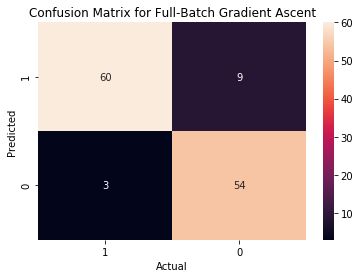

Performance Metrics for Mini-Batch Model:
Accuracy:0.8809523809523809
Precision:0.98
Recall:0.7777777777777778
Negative Predictive Value(NPV): 0.8157894736842105
False Positive Rate(FPR): 0.015873015873015872
False Discovery Rate(FDR): 0.02
F1 Measure: 0.8672566371681417
F2 Measure: 0.8112582781456954


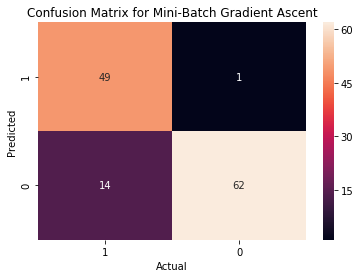

Performance Metrics for Stochastic Model:
Accuracy:0.9047619047619048
Precision:0.9811320754716981
Recall:0.8253968253968254
Negative Predictive Value(NPV): 0.8493150684931506
False Positive Rate(FPR): 0.015873015873015872
False Discovery Rate(FDR): 0.018867924528301886
F1 Measure: 0.8965517241379309
F2 Measure: 0.8524590163934426


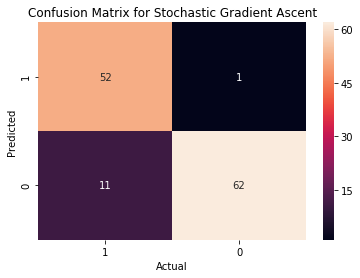

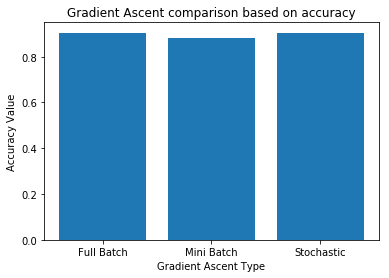

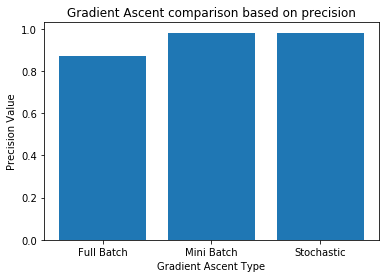

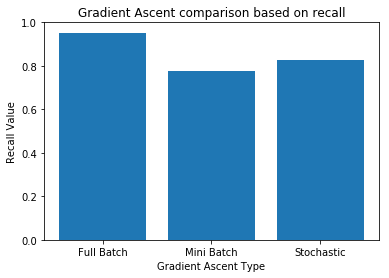

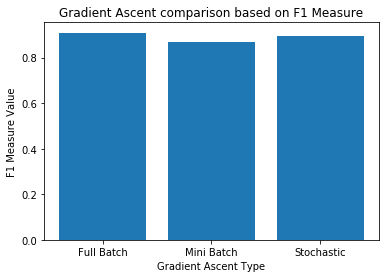

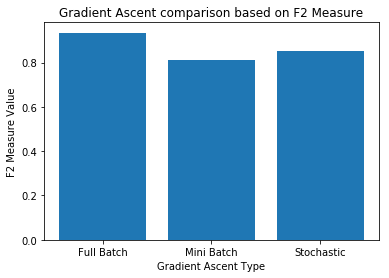

<Figure size 432x288 with 0 Axes>

In [17]:
evaluate_all_models(training_data, train_labels, test_data, test_labels)